In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np

In [156]:
dataset = pd.read_csv('housing.csv')
dataset = dataset.dropna()

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
Y = dataset['median_house_value']

X = dataset.loc[:, 'longitude':'median_income']

In [158]:

#Normalization not useful, so not used

"""
from sklearn.preprocessing import MinMaxScaler

target = 'medv'

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)

#Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))
multiplied_by = scaler.scale_[8]
added = scaler.min_[8]

X = pd.DataFrame(scaled_train, columns=X.columns.values)
X.head()
"""


'\nfrom sklearn.preprocessing import MinMaxScaler\n\ntarget = \'medv\'\n\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_train = scaler.fit_transform(X)\n\n#Print out the adjustment that the scaler applied to the total_earnings column of data\nprint("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[8], scaler.min_[8]))\nmultiplied_by = scaler.scale_[8]\nadded = scaler.min_[8]\n\nX = pd.DataFrame(scaled_train, columns=X.columns.values)\nX.head()\n'

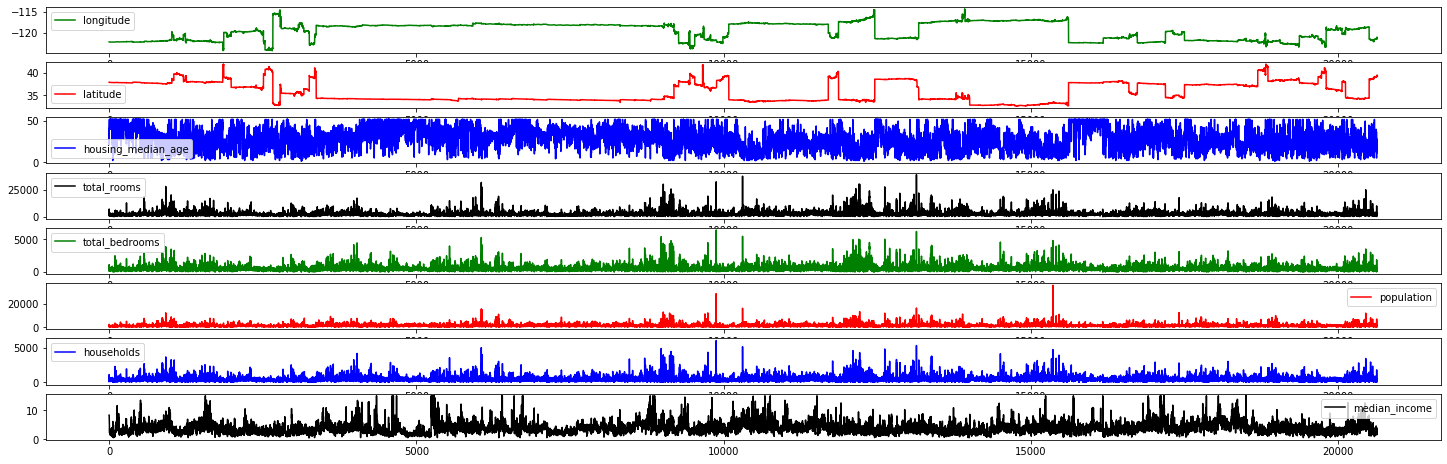

In [159]:
#Q1: sub-plotting

import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
color = ['green', 'red', 'blue', 'black']
for i in range(8):
  plt.subplot(10, 1, i+1)
  plt.plot(dataset.iloc[0:, i], color=color[i%4], label=dataset.columns[i])
  plt.legend(loc='best')
plt.show()



In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, shuffle=True, random_state=2003)

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()


In [0]:
import torch
from torch.nn import Conv1d

from torch.nn import MaxPool1d

from torch.nn import Flatten

In [0]:
from torch.nn import Linear
from torch.nn.functional import relu, dropout
from torch.utils.data import DataLoader, TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.max_pooling_layer = MaxPool1d(1)
    
    self.conv_layer = Conv1d(batch_size, 360, 1)

    self.max_pooling_layer2 = MaxPool1d(1)  #NEW

    self.conv_layer2 = Conv1d(360, 360, 1) #NEW

    self.max_pooling_layer3 = MaxPool1d(1)  #NEW

    self.conv_layer3 = Conv1d(360, 248, 1) #NEW

    self.max_pooling_layer4 = MaxPool1d(1)  #NEW

    self.conv_layer4 = Conv1d(248, 160, 1) #NEW

    self.max_pooling_layer5 = MaxPool1d(1)  #NEW

    self.conv_layer5 = Conv1d(160, 160, 1) #NEW

    self.max_pooling_layer6 = MaxPool1d(1)  #NEW

    self.flatten_layer = Flatten()

    self.linear_layer = Linear(160, 128)

    self.linear_layer2 = Linear(128, 64) #NEW

    self.output_layer = Linear(64, outputs)

  def feed(self, input):
    input = input.reshape((self.batch_size, self.inputs, 1))

    output = relu(self.input_layer(input))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = self.max_pooling_layer2(output)   #NEW

    output = relu(self.conv_layer2(output))   #NEW

    output = self.max_pooling_layer2(output)   #NEW

    output = relu(self.conv_layer3(output))   #NEW

    output = self.max_pooling_layer3(output)   #NEW

    output = relu(self.conv_layer4(output))   #NEW

    output = self.max_pooling_layer4(output)   #NEW

    output = relu(self.conv_layer5(output))   #NEW

    output = self.max_pooling_layer5(output)   #NEW

    output = self.flatten_layer(output)

    output = self.linear_layer(output)

    output = self.linear_layer2(output) #NEW

    output = self.output_layer(output)

    return output


In [164]:
from torch.optim import Rprop
from torch.optim import RMSprop
from torch.optim import SGD
from torch.optim import Adam

from torch.nn import L1Loss

!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [173]:
batch_size = 128

model = CnnRegressor(batch_size, X.shape[1], 1)
model.cuda()


CnnRegressor(
  (input_layer): Conv1d(8, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(128, 360, kernel_size=(1,), stride=(1,))
  (max_pooling_layer2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv1d(360, 360, kernel_size=(1,), stride=(1,))
  (max_pooling_layer3): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv1d(360, 248, kernel_size=(1,), stride=(1,))
  (max_pooling_layer4): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer4): Conv1d(248, 160, kernel_size=(1,), stride=(1,))
  (max_pooling_layer5): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer5): Conv1d(160, 160, kernel_size=(1,), stride=(1,))
  (max_pooling_layer6): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fla

In [0]:
def model_loss(model, dataset, train=False, optimizer = None):

  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataset):
    predictions = model.feed(input)

    loss = performance(predictions, output)

    score_metric.update([predictions, output])
    score = score_metric.compute()

    if(train):
      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

    avg_loss += loss.item()
    avg_score += score
    count += 1

  return avg_loss/count, avg_score/count

In [177]:

epochs = 100

optimizer = Adam(model.parameters(), lr=0.02) 

inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs,outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

for epoch in range(epochs):
  #optimizer = Rprop(model.parameters(), lr=1e-5) 
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)

  print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "n\tR^2 Score = " + str(avg_r2_score))
  

Epoch 1:
	Loss = 56741.11542792793n	R^2 Score = 0.1878133697720331
Epoch 2:
	Loss = 48471.5254786036n	R^2 Score = 0.642250371978254
Epoch 3:
	Loss = 48158.9555884009n	R^2 Score = 0.6589629685672765
Epoch 4:
	Loss = 47125.13520551802n	R^2 Score = 0.6630610889583302
Epoch 5:
	Loss = 47782.94569960586n	R^2 Score = 0.6551277880186628
Epoch 6:
	Loss = 49640.63868947072n	R^2 Score = 0.6574249495957903
Epoch 7:
	Loss = 48934.319855011265n	R^2 Score = 0.6097890407675589
Epoch 8:
	Loss = 52288.68581081081n	R^2 Score = 0.6009606286860125
Epoch 9:
	Loss = 48864.81601914414n	R^2 Score = 0.6360196801775458
Epoch 10:
	Loss = 49188.21192286036n	R^2 Score = 0.6414766286441757
Epoch 11:
	Loss = 46903.593398085584n	R^2 Score = 0.6625374918761402
Epoch 12:
	Loss = 48822.919517173425n	R^2 Score = 0.6361901950338162
Epoch 13:
	Loss = 46906.92081925676n	R^2 Score = 0.6638489379778516
Epoch 14:
	Loss = 47555.284557995496n	R^2 Score = 0.6647034164273499
Epoch 15:
	Loss = 48410.83847128379n	R^2 Score = 0.66852

In [178]:

from time import time

inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs,outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

tm = time()
avg_loss, avg_r2_score = model_loss(model, loader)
print("Time inference:  " + str(time() - tm))
print("The model's L1 loss is: " + str(avg_loss))
print("The model's R^2 score is: " + str(avg_r2_score))

Time inference:  0.1892530918121338
The model's L1 loss is: 46065.48088430851
The model's R^2 score is: 0.6605923677434938


In [179]:
torch.save(model, '1119946_1dconv_reg')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CnnRegressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
